## Producing a plot with the order of accuracy of the AdImEx Strang scheme at various $C$

Amber te Winkel, 16-06-2025

Using results produced on 16-06-2025.

dx = 0.0500,0.0250,0.0125, nx=20,40,80, nt=1,2,4, dt=0.0200,0.0100,0.0050, xmax=1, nt*dt = 0.0200

u varies to give the different C's. u=0.1,1,3.125,6.25,10

In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
xmax = 1.0
nx_array = np.array([80,40, 20], dtype=float)
dx_array = xmax/nx_array

# fine, regular, coarse
# C=0.04
l2_0p04 = [3.70380914e-10,  1.15934634e-08, 3.64899796e-07]

# C=0.4
l2_0p4 = [9.73348321e-08, 8.64312565e-07, 9.57802289e-06]

# C=1.25
l2_1p25 = [3.86515073e-06, 2.94901336e-05, 2.40274300e-04 ]

# C=2.5
l2_2p5 = [0.00031381, 0.00124502, 0.00482359]

# C=4.0
l2_4p0 = [0.0024964,  0.009743, 0.03557179  ]


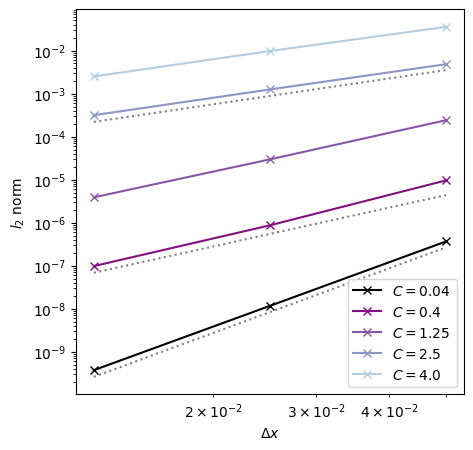

In [54]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))

#colors = ['#bae4b3','#74c476','#31a354','#006d2c','black']
colors = ['#b3cde3','#8c96c6','#8856a7','#810f7c','black']
factor = 2
gridscale = np.logspace(0, np.log10(2*factor), num=10)
gridsizes = dx_array[0]*gridscale
#print(gridsizes)

C = [0.04, 0.4, 1.25, 2.5, 4.0]
i=0
for l2 in l2_0p04, l2_0p4, l2_1p25, l2_2p5, l2_4p0:
    ax1.plot(dx_array, l2, marker='x', label=f'$C={C[i]}$', color = colors[len(colors) - i - 1])
    i += 1 
secondorder = l2_2p5[0]*0.7*gridscale*gridscale
thirdorder = l2_0p4[0]*0.7*gridscale*gridscale*gridscale
fifthorder = l2_0p04[0]*0.7*gridscale*gridscale*gridscale*gridscale*gridscale

ax1.plot(gridsizes, secondorder, color='grey', linestyle=':')#, linewidth=0.5)
ax1.plot(gridsizes, thirdorder, color='grey', linestyle=':')#, linewidth=0.5)
ax1.plot(gridsizes, fifthorder, color='grey', linestyle=':')#, linewidth=0.5)
ax1.legend()
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_xlabel('$\\Delta x$')
ax1.set_ylabel('$l_2$ norm')
plt.show()
#
#
#    s = plot_args[c]['label']
#    # Calculate error for each grid spacing (one or three)
#    rmse = np.zeros(len(nx_arr))
#    dxc_arr = np.zeros(len(nx_arr))
#    for xi in range(len(nx_arr)):
#        l = gridlabels[xi]
#        nx = nx_arr[xi]
#        nt = nt_arr[xi]                
#        # Calculate RMSE for each grid spacing at the final time, assume uniform grid
#        rmse[xi] = epm.l2norm(locals()[f'psi_{s}_{l}'][nt], locals()[f'psi_an_{l}'][nt], resolution[xi]) # Calculate RMSE for each grid spacing at the final time            
#
#    # Plot error over grid spacing
#    ax1.scatter(resolution, rmse, marker=plot_args[c]['marker'], label=f'$\\Psi$ {plot_args[c]['label']}', color=plot_args[c]['color'])
#    logging.info('')
#    logging.info(f'{cases[c]['scheme']} - L2 norm array for the different resolutions (fine, coarse, reg): {rmse}')
#
#    # Order of accuracy lines in the plot for reference
#    firstorder = rmse[0]*gridscale
#    secondorder = rmse[0]*gridscale*gridscale
#    thirdorder = rmse[0]*gridscale*gridscale*gridscale
#    fourthorder = rmse[0]*gridscale*gridscale*gridscale*gridscale
#    ax1.plot(gridsizes, firstorder, color='grey', linestyle=':', linewidth=0.5)
#    ax1.plot(gridsizes, secondorder, color='grey', linestyle='-', linewidth=0.5)
#    ax1.plot(gridsizes, thirdorder, color='black', linestyle=':', linewidth=0.5)
#    ax1.plot(gridsizes, fourthorder, color='black', linestyle='-', linewidth=0.5)
#
## Plot details
#ax1.set_xscale('log')
#ax1.set_yscale('log')
#ax1.set_title(f'$l_2$ vs {var_acc} at t={nt*dt}')
#ax1.set_ylabel('$l_2$')
#ax1.set_xlabel(var_acc)
#ax1.legend()
#
## Save plot of error over grid spacing
#plt.tight_layout()
#if save_as == 'test':
#    plt.savefig(outputdir + 'L2.pdf')
#elif save_as == 'store':
#    plt.savefig(outputdir + f'L2_{var_acc}.pdf')
#plt.close()